In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_dados = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df_dados

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df_dados2012 = df_dados[df_dados["Year"] == 2012]

In [5]:
df_dados2012 = df_dados2012[df_dados2012["Income composition of resources"] > 0]
df_dados2012 = df_dados2012[df_dados2012["Schooling"] > 0]
df_dados2012 = df_dados2012[df_dados2012["infant deaths"] < 900]
df_dados2012 = df_dados2012[df_dados2012["under-five deaths "] < 900]
df_dados2012 = df_dados2012[df_dados2012["GDP"] > 0]

In [6]:
df_alcool = df_dados2012.dropna(subset=["Alcohol"])
df_BMI = df_dados2012.dropna(subset=[" BMI "])

In [7]:
def quantidade_k(df:pd.DataFrame, coluna1, coluna2):
    dists = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df[[coluna1, coluna2]])
        dists.append(kmeans.inertia_)
    sns.lineplot(x = range(1,10), y = dists)

In [8]:
def name_countries_classificated(df:pd.DataFrame, label:np.ndarray):

    dfs_ = [
        df.query(f'classificacao == {unique_label}')['Country']\
            .reset_index(drop=True)\
            .rename(f'{unique_label}', axis=0)
        for unique_label in np.unique(label)
    ]

    return pd.concat(dfs_, axis=1)

# Agrupamento entre álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


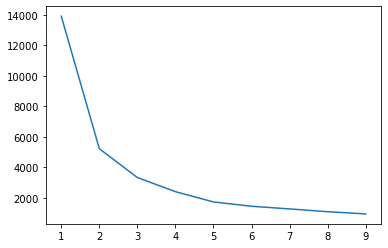

In [9]:
quantidade_k(df_alcool, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

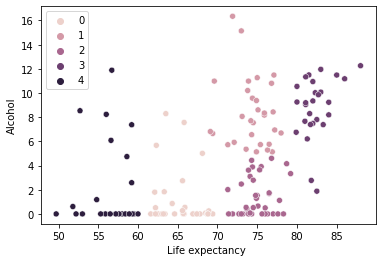

In [10]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_alcool[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [11]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3,4
0,Bhutan,Albania,Algeria,Australia,Afghanistan
1,Botswana,Antigua and Barbuda,Armenia,Austria,Angola
2,Cambodia,Argentina,Azerbaijan,Belgium,Benin
3,Comoros,Barbados,Bahrain,Canada,Burkina Faso
4,Djibouti,Belarus,Bangladesh,Chile,Burundi
5,Ethiopia,Belize,Bosnia and Herzegovina,Cyprus,Cameroon
6,Fiji,Brazil,Brunei Darussalam,Denmark,Central African Republic
7,Gabon,Bulgaria,Cabo Verde,Finland,Chad
8,Ghana,China,Colombia,France,Equatorial Guinea
9,Guyana,Croatia,Costa Rica,Germany,Guinea


Em geral, os países africanos foram colocados no mesmo grupo por causa da sua baixa expectativa de vida, sendo estes muçulmanos ou nao. É válido ressaltar que, por motivos culturais ou religiosos, em países muçulmanos não há consumo de álcool. Os próprios países muçulmanos foram agrupados de forma separada.

Os países com maior expectativa de vida foram todos colocados no mesmo grupo. Não há presença de países com baixíssimo consumo de álcool e, no geral, são países desenvolvidos europeus.

# Agrupamento entre álcool e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


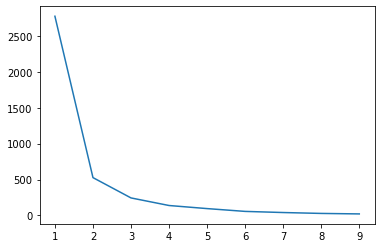

In [12]:
quantidade_k(df_alcool, "Alcohol", "Income composition of resources")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Alcohol'>

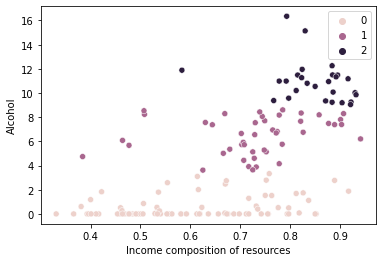

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool[["Alcohol", "Income composition of resources"]])
sns.scatterplot(data = df_alcool, x = "Income composition of resources", y = "Alcohol", hue = kmeans.labels_)

In [14]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Albania,Australia
1,Algeria,Angola,Austria
2,Azerbaijan,Antigua and Barbuda,Belarus
3,Bahrain,Argentina,Belgium
4,Bangladesh,Armenia,Bulgaria
...,...,...,...
75,Uganda,NaN,NaN
76,United Arab Emirates,NaN,NaN
77,Uzbekistan,NaN,NaN
78,Vanuatu,NaN,NaN


Países com um maior consumo de álcool tendem a ter um IDH maior que 0.8. A aparente excessão é a Guiné Equatorial, com 0.591 de IDH

# Agrupamento entre expectativa de vida e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


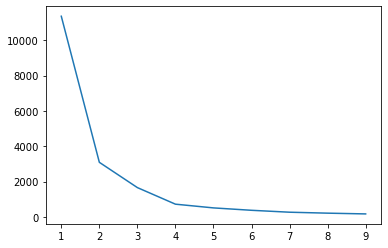

In [15]:
quantidade_k(df_dados2012, "Life expectancy ", "Income composition of resources")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

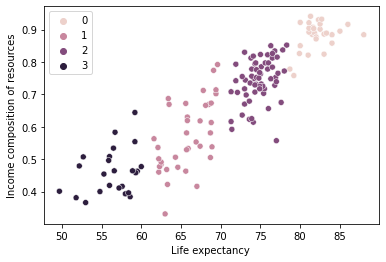

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Income composition of resources"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Income composition of resources", hue = kmeans.labels_)

In [17]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Australia,Belize,Albania,Afghanistan
1,Austria,Bhutan,Algeria,Angola
2,Belgium,Botswana,Antigua and Barbuda,Benin
3,Canada,Cambodia,Argentina,Burkina Faso
4,Chile,Comoros,Armenia,Burundi
...,...,...,...,...
58,NaN,NaN,Turkey,NaN
59,NaN,NaN,Ukraine,NaN
60,NaN,NaN,United Arab Emirates,NaN
61,NaN,NaN,Uruguay,NaN


Cuba possui um IDH de 0.764, mas possui uma elevada expectativa de vida, fazendo parte do grupo de maior expectativa de vida

# Agrupamento entre escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


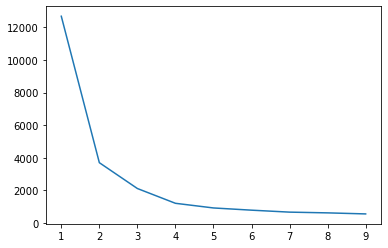

In [18]:
quantidade_k(df_dados2012, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

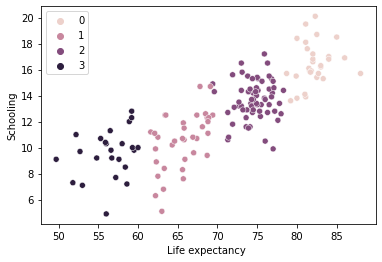

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [20]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Australia,Belize,Albania,Afghanistan
1,Austria,Bhutan,Algeria,Angola
2,Belgium,Botswana,Antigua and Barbuda,Benin
3,Canada,Cambodia,Argentina,Burkina Faso
4,Chile,Comoros,Armenia,Burundi
...,...,...,...,...
60,NaN,NaN,Turkey,NaN
61,NaN,NaN,Ukraine,NaN
62,NaN,NaN,United Arab Emirates,NaN
63,NaN,NaN,Uruguay,NaN


Mesmo possuindo um nível de escolaridade tão baixo quanto os africanos, países membros do grupo 2 geralmente estão localizados na ásia, por causa de uma maior expectativa de vida

# Agrupamento entre escolaridade e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


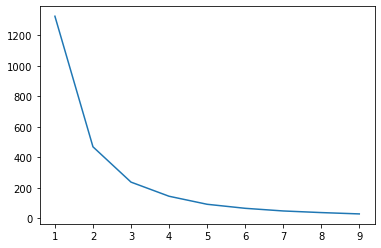

In [21]:
quantidade_k(df_dados2012, "Income composition of resources", "Schooling")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

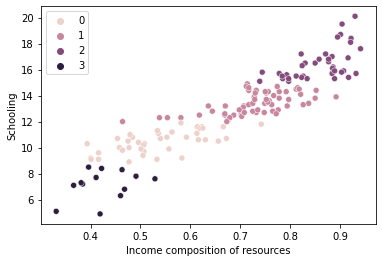

In [22]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Income composition of resources", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Income composition of resources", y = "Schooling", hue = kmeans.labels_)

In [23]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Albania,Argentina,Burkina Faso
1,Angola,Algeria,Australia,Central African Republic
2,Azerbaijan,Antigua and Barbuda,Austria,Chad
3,Bangladesh,Armenia,Barbados,Djibouti
4,Benin,Bahrain,Belarus,Ethiopia
...,...,...,...,...
56,NaN,Tunisia,NaN,NaN
57,NaN,Turkey,NaN,NaN
58,NaN,United Arab Emirates,NaN,NaN
59,NaN,Uzbekistan,NaN,NaN


# Agrupamento entre escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


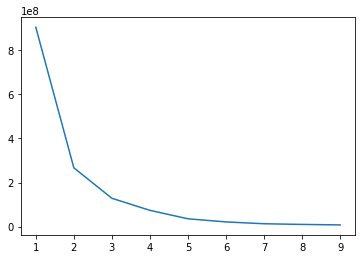

In [24]:
quantidade_k(df_dados2012, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

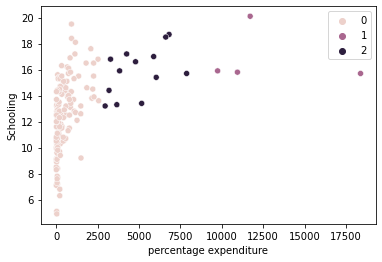

In [25]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_dados2012[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [26]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Australia,Austria
1,Albania,Canada,Brunei Darussalam
2,Algeria,Sweden,Finland
3,Angola,Switzerland,Iceland
4,Antigua and Barbuda,NaN,Ireland
...,...,...,...
131,Uruguay,NaN,NaN
132,Uzbekistan,NaN,NaN
133,Vanuatu,NaN,NaN
134,Zambia,NaN,NaN


# Agrupamento entre escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


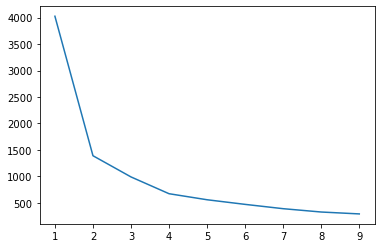

In [27]:
quantidade_k(df_alcool, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

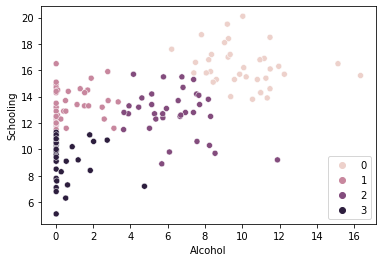

In [28]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [29]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Argentina,Algeria,Albania,Afghanistan
1,Australia,Azerbaijan,Angola,Bangladesh
2,Austria,Bahrain,Antigua and Barbuda,Benin
3,Barbados,Bhutan,Armenia,Burkina Faso
4,Belarus,Botswana,Belize,Burundi
5,Belgium,Brunei Darussalam,Bosnia and Herzegovina,Cambodia
6,Bulgaria,Cabo Verde,Brazil,Cameroon
7,Canada,Costa Rica,Chile,Central African Republic
8,Croatia,El Salvador,China,Chad
9,Cyprus,Estonia,Colombia,Comoros


# Agrupamento entre massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


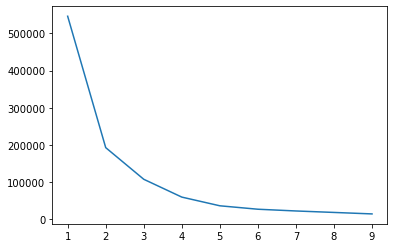

In [30]:
quantidade_k(df_BMI, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

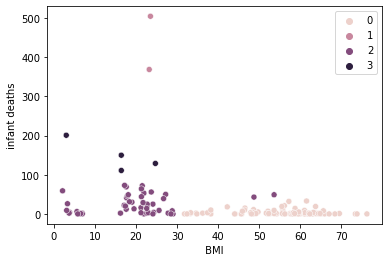

In [31]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_BMI[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [32]:
df_ = df_BMI.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Albania,Nigeria,Afghanistan,Bangladesh
1,Algeria,Pakistan,Angola,China
2,Antigua and Barbuda,NaN,Belarus,Ethiopia
3,Argentina,NaN,Benin,Indonesia
4,Armenia,NaN,Bhutan,NaN
...,...,...,...,...
86,Turkmenistan,NaN,NaN,NaN
87,Ukraine,NaN,NaN,NaN
88,United Arab Emirates,NaN,NaN,NaN
89,Uruguay,NaN,NaN,NaN


Os dados da Índia estavam incorretos, apresentando um número de mortalidade infantil muito elevado. Países muito populosos da Ásia se destacam nesse quesito

# Agrupamento entre massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


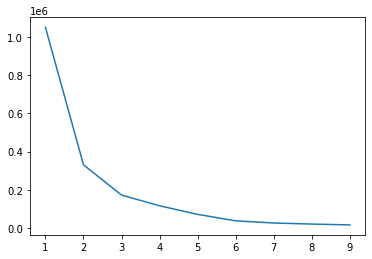

In [33]:
quantidade_k(df_BMI, " BMI ", "under-five deaths ")

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

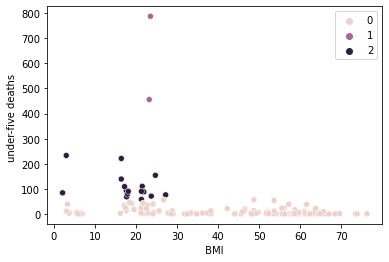

In [34]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI[[" BMI ", "under-five deaths "]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "under-five deaths ", hue = kmeans.labels_)

In [35]:
df_ = df_BMI.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Albania,Nigeria,Afghanistan
1,Algeria,Pakistan,Angola
2,Antigua and Barbuda,NaN,Bangladesh
3,Argentina,NaN,Burkina Faso
4,Armenia,NaN,Cameroon
...,...,...,...
128,Uruguay,NaN,NaN
129,Uzbekistan,NaN,NaN
130,Vanuatu,NaN,NaN
131,Zambia,NaN,NaN


# Agrupamento entre gastos governamentais e PIB per capita

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


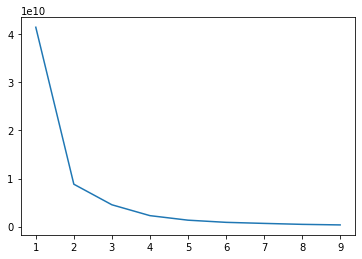

In [36]:
quantidade_k(df_dados2012, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

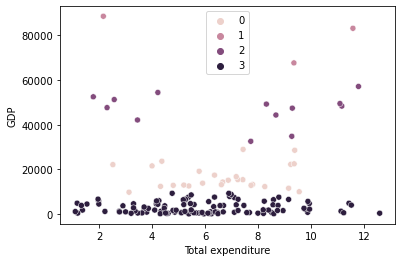

In [37]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_dados2012, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [38]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Antigua and Barbuda,Australia,Austria,Afghanistan
1,Argentina,Qatar,Brunei Darussalam,Albania
2,Bahrain,Switzerland,Canada,Algeria
3,Barbados,NaN,Finland,Angola
4,Brazil,NaN,Iceland,Armenia
...,...,...,...,...
106,NaN,NaN,NaN,Uruguay
107,NaN,NaN,NaN,Uzbekistan
108,NaN,NaN,NaN,Vanuatu
109,NaN,NaN,NaN,Zambia


O PIB per capita de um país não influencia nos gastos governamentais com saúde

# Países com IDH até 0.600

In [47]:
df_0_6 = df_dados2012.copy()
df_0_6 = df_0_6[df_0_6["Income composition of resources"] <= 0.600]

In [49]:
df_alcool06 = df_0_6.dropna(subset = ["Alcohol"])
df_BMI06 = df_0_6.dropna(subset = [" BMI "])

# Álcool e Expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


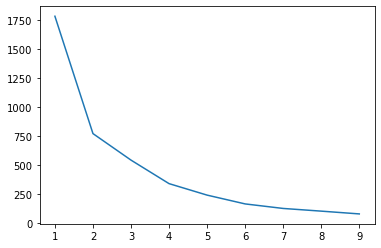

In [111]:
quantidade_k(df_alcool06, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

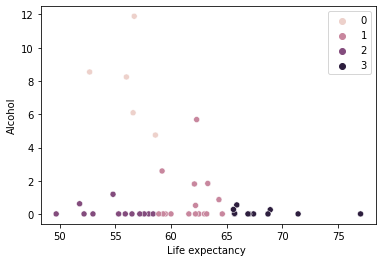

In [112]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool06[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool06, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [113]:
df_ = df_alcool06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Angola,Afghanistan,Burundi,Bangladesh
1,Burkina Faso,Benin,Cameroon,Bhutan
2,Equatorial Guinea,Comoros,Central African Republic,Cambodia
3,Nigeria,Djibouti,Chad,Kiribati
4,Zimbabwe,Ethiopia,Guinea,Liberia
5,NaN,Ghana,Guinea-Bissau,Myanmar
6,NaN,Haiti,Lesotho,Nepal
7,NaN,Kenya,Malawi,Pakistan
8,NaN,Madagascar,Mali,Sao Tome and Principe
9,NaN,Mauritania,Mozambique,Senegal


# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


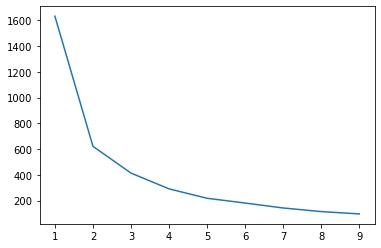

In [53]:
quantidade_k(df_0_6, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

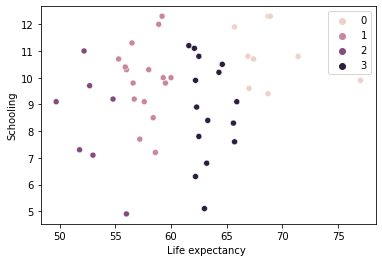

In [56]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [57]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Bangladesh,Afghanistan,Central African Republic,Comoros
1,Bhutan,Angola,Chad,Djibouti
2,Cambodia,Benin,Lesotho,Ethiopia
3,Kiribati,Burkina Faso,Mozambique,Ghana
4,Liberia,Burundi,Nigeria,Haiti
5,Nepal,Cameroon,Sierra Leone,Kenya
6,Sao Tome and Principe,Equatorial Guinea,South Sudan,Madagascar
7,Solomon Islands,Guinea,NaN,Mauritania
8,Vanuatu,Guinea-Bissau,NaN,Myanmar
9,NaN,Malawi,NaN,Niger


# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


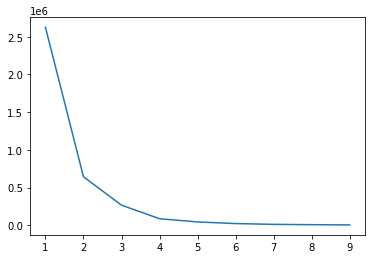

In [58]:
quantidade_k(df_0_6, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

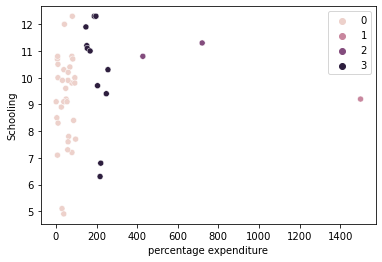

In [59]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [60]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Equatorial Guinea,Swaziland,Angola
1,Bangladesh,NaN,Vanuatu,Bhutan
2,Benin,NaN,NaN,Djibouti
3,Burkina Faso,NaN,NaN,Ghana
4,Burundi,NaN,NaN,Kenya
5,Cambodia,NaN,NaN,Kiribati
6,Cameroon,NaN,NaN,Lesotho
7,Central African Republic,NaN,NaN,Nigeria
8,Chad,NaN,NaN,Solomon Islands
9,Comoros,NaN,NaN,Sudan


# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


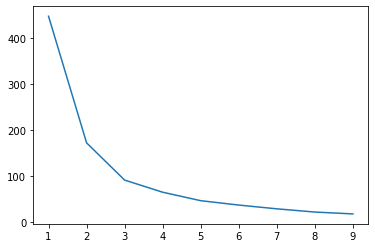

In [61]:
quantidade_k(df_alcool06, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

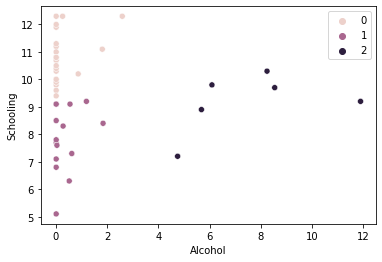

In [62]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool06[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool06, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [63]:
df_ = df_alcool06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Central African Republic,Angola
1,Bangladesh,Chad,Burkina Faso
2,Benin,Djibouti,Equatorial Guinea
3,Bhutan,Ethiopia,Haiti
4,Burundi,Guinea,Nigeria
5,Cambodia,Guinea-Bissau,Zimbabwe
6,Cameroon,Mali,NaN
7,Comoros,Mauritania,NaN
8,Ghana,Mozambique,NaN
9,Kenya,Myanmar,NaN


# Massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


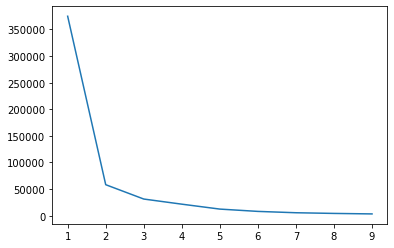

In [64]:
quantidade_k(df_BMI06, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

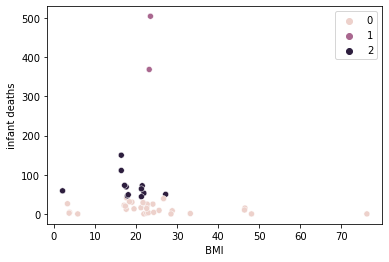

In [68]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI06[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI06, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [69]:
df_ = df_BMI06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Benin,Nigeria,Afghanistan
1,Bhutan,Pakistan,Angola
2,Burkina Faso,NaN,Bangladesh
3,Burundi,NaN,Cameroon
4,Cambodia,NaN,Chad
5,Central African Republic,NaN,Ethiopia
6,Comoros,NaN,Kenya
7,Djibouti,NaN,Mali
8,Equatorial Guinea,NaN,Mozambique
9,Ghana,NaN,Myanmar


# Massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


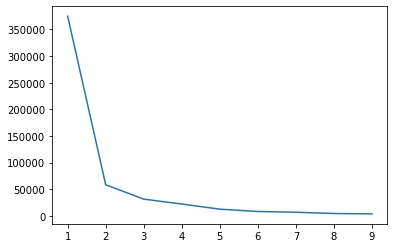

In [70]:
quantidade_k(df_BMI06, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

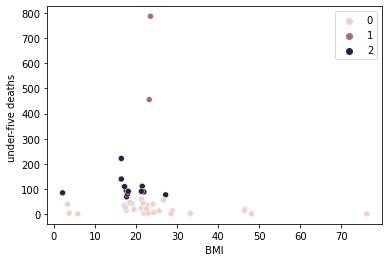

In [71]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI06[[" BMI ", "under-five deaths "]])
sns.scatterplot(data = df_BMI06, x = " BMI ", y = "under-five deaths ", hue = kmeans.labels_)

In [72]:
df_ = df_BMI06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Benin,Nigeria,Afghanistan
1,Bhutan,Pakistan,Angola
2,Burundi,NaN,Bangladesh
3,Cambodia,NaN,Burkina Faso
4,Central African Republic,NaN,Cameroon
5,Comoros,NaN,Chad
6,Djibouti,NaN,Ethiopia
7,Equatorial Guinea,NaN,Kenya
8,Ghana,NaN,Mali
9,Guinea,NaN,Mozambique


# Gastos governamentais e PIB per capita

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


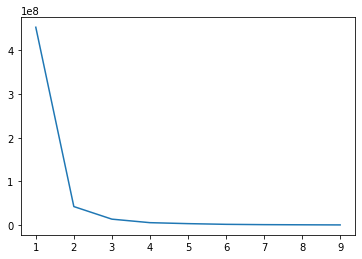

In [73]:
quantidade_k(df_0_6, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

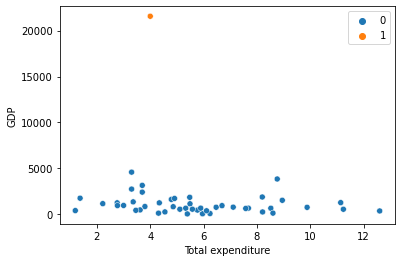

In [75]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_0_6[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_0_6, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [76]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1
0,Afghanistan,Equatorial Guinea
1,Angola,NaN
2,Bangladesh,NaN
3,Benin,NaN
4,Bhutan,NaN
5,Burkina Faso,NaN
6,Burundi,NaN
7,Cambodia,NaN
8,Cameroon,NaN
9,Central African Republic,NaN


# Países com IDH entre 0.601 e 0.800

In [82]:
df_6_8 = df_dados2012.copy()
df_6_8 = df_6_8[df_6_8["Income composition of resources"] > 0.600]
df_6_8 = df_6_8[df_6_8["Income composition of resources"] <= 0.800]

In [83]:
df_6_8

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8
99,Armenia,2012,Developing,74.4,121.0,1,3.89,274.152699,95.0,0,...,96.0,4.48,95.0,0.1,3684.848100,2881922.0,2.0,2.1,0.732,12.7
147,Azerbaijan,2012,Developing,71.9,123.0,5,0.01,285.610391,88.0,0,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,74569867.0,4.9,4.7,0.750,14.3
2700,Turkmenistan,2012,Developing,65.6,22.0,7,2.75,579.412824,98.0,0,...,98.0,1.96,97.0,0.1,6675.262954,5267839.0,3.2,3.3,0.672,10.7
2733,Ukraine,2012,Developing,77.0,25.0,5,8.44,453.783085,46.0,12746,...,72.0,7.47,76.0,0.2,3855.421280,455933.0,2.4,2.4,0.739,15.1
2813,Uruguay,2012,Developing,76.5,118.0,0,5.77,339.719049,95.0,0,...,95.0,8.74,95.0,0.1,1592.681900,3396777.0,1.5,1.5,0.784,15.5


In [84]:
df_alcool68 = df_6_8.dropna(subset = ["Alcohol"])
df_BMI68 = df_6_8.dropna(subset = [" BMI "])

# Álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


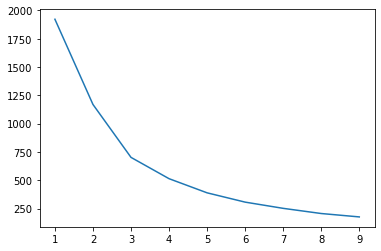

In [114]:
quantidade_k(df_alcool68, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

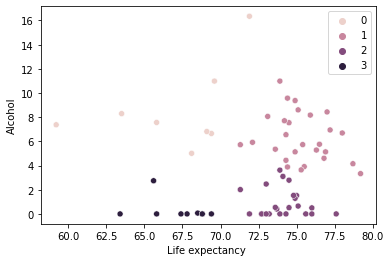

In [117]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool68[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool68, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [118]:
df_ = df_alcool68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Belarus,Albania,Algeria,Botswana
1,Belize,Antigua and Barbuda,Azerbaijan,Fiji
2,Gabon,Armenia,Cabo Verde,Indonesia
3,Guyana,Barbados,El Salvador,Mongolia
4,Kazakhstan,Bosnia and Herzegovina,Guatemala,Namibia
5,Philippines,Brazil,Honduras,Tajikistan
6,Russian Federation,Bulgaria,Iraq,Timor-Leste
7,South Africa,China,Jordan,Turkmenistan
8,NaN,Colombia,Kuwait,Uzbekistan
9,NaN,Costa Rica,Lebanon,NaN


# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


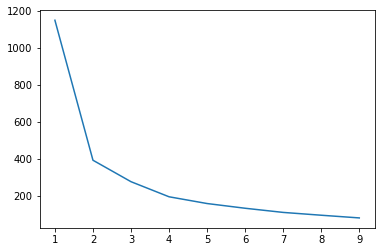

In [89]:
quantidade_k(df_6_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

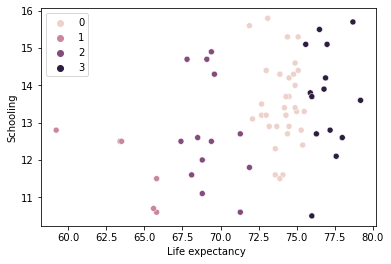

In [90]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_6_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [91]:
df_ = df_6_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Algeria,Botswana,Azerbaijan,Albania
1,Armenia,Gabon,Belize,Antigua and Barbuda
2,Barbados,Guyana,Fiji,Bosnia and Herzegovina
3,Belarus,Namibia,Guatemala,Costa Rica
4,Brazil,South Africa,Indonesia,Cuba
5,Bulgaria,Turkmenistan,Kazakhstan,Iraq
6,Cabo Verde,NaN,Mongolia,Maldives
7,China,NaN,Philippines,Mexico
8,Colombia,NaN,Russian Federation,Montenegro
9,Dominican Republic,NaN,Suriname,Oman


# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


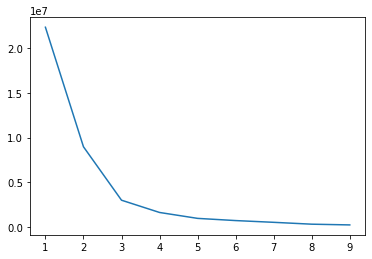

In [92]:
quantidade_k(df_6_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

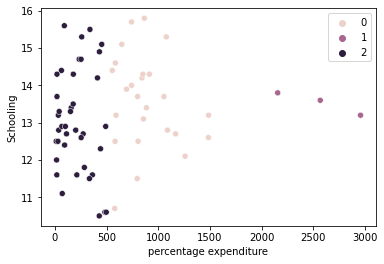

In [94]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_6_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [95]:
df_ = df_6_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Algeria,Antigua and Barbuda,Albania
1,Belize,Costa Rica,Armenia
2,Bosnia and Herzegovina,Kuwait,Azerbaijan
3,Brazil,NaN,Barbados
4,Bulgaria,NaN,Belarus
5,Colombia,NaN,Botswana
6,Cuba,NaN,Cabo Verde
7,Dominican Republic,NaN,China
8,El Salvador,NaN,Ecuador
9,Gabon,NaN,Fiji


# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


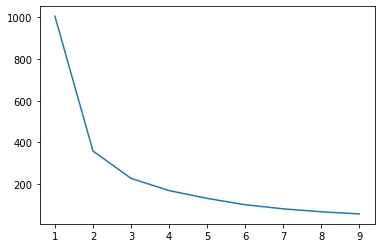

In [96]:
quantidade_k(df_alcool68, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

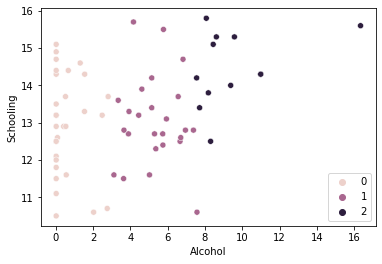

In [97]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool68[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool68, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [98]:
df_ = df_alcool68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Algeria,Albania,Antigua and Barbuda
1,Azerbaijan,Armenia,Barbados
2,Botswana,Belize,Belarus
3,Cabo Verde,Bosnia and Herzegovina,Brazil
4,El Salvador,China,Bulgaria
5,Fiji,Colombia,Gabon
6,Guatemala,Costa Rica,Georgia
7,Indonesia,Cuba,Grenada
8,Iraq,Dominican Republic,Romania
9,Jordan,Ecuador,Russian Federation


# Massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


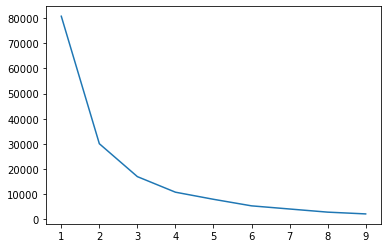

In [99]:
quantidade_k(df_BMI68, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

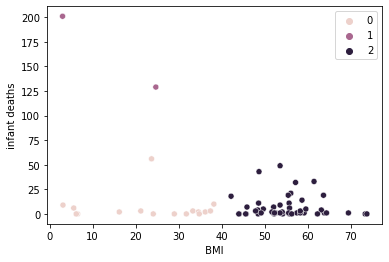

In [100]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI68[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI68, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [101]:
df_ = df_BMI68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Belarus,China,Albania
1,Botswana,Indonesia,Algeria
2,Cabo Verde,NaN,Antigua and Barbuda
3,Fiji,NaN,Armenia
4,Gabon,NaN,Azerbaijan
5,Kazakhstan,NaN,Barbados
6,Malaysia,NaN,Belize
7,Maldives,NaN,Bosnia and Herzegovina
8,Mauritius,NaN,Brazil
9,Montenegro,NaN,Bulgaria


# Massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


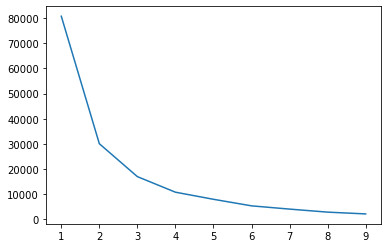

In [102]:
quantidade_k(df_BMI68, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

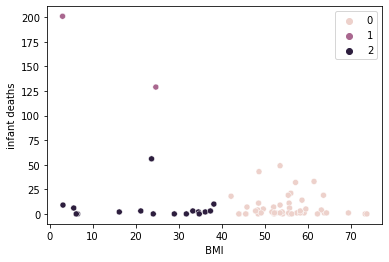

In [103]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI68[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI68, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [104]:
df_ = df_BMI68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Albania,China,Belarus
1,Algeria,Indonesia,Botswana
2,Antigua and Barbuda,NaN,Cabo Verde
3,Armenia,NaN,Fiji
4,Azerbaijan,NaN,Gabon
5,Barbados,NaN,Kazakhstan
6,Belize,NaN,Malaysia
7,Bosnia and Herzegovina,NaN,Maldives
8,Brazil,NaN,Mauritius
9,Bulgaria,NaN,Montenegro


# Países com IDH acima de 0.800

In [107]:
df_8 = df_dados2012.copy()
df_8 = df_8[df_8["Income composition of resources"] > 0.800]

In [108]:
df_alcool8 = df_8.dropna(subset = ["Alcohol"])
df_BMI8 = df_8.dropna(subset = [" BMI "])

# Álcool e Expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


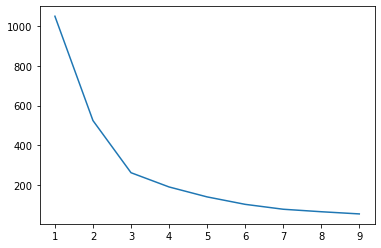

In [119]:
quantidade_k(df_alcool8, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

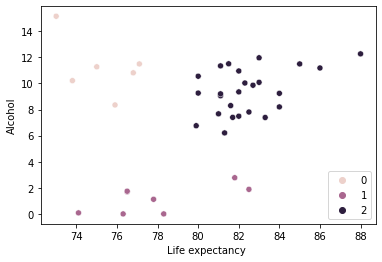

In [120]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool8, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


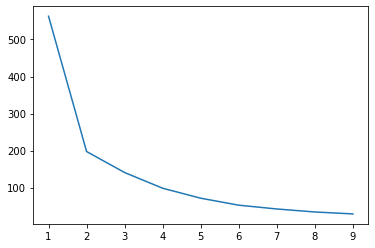

In [121]:
quantidade_k(df_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

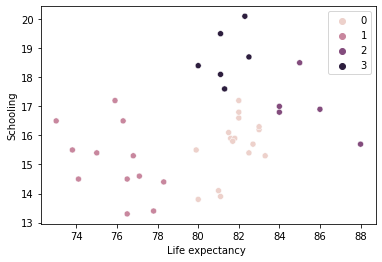

In [124]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [125]:
df_ = df_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Belgium,Argentina,Austria,Australia
1,Canada,Bahrain,Finland,Denmark
2,Chile,Brunei Darussalam,Germany,Iceland
3,Cyprus,Croatia,Greece,Netherlands
4,France,Estonia,Ireland,New Zealand
5,Israel,Hungary,NaN,Norway
6,Italy,Latvia,NaN,NaN
7,Japan,Lithuania,NaN,NaN
8,Luxembourg,Poland,NaN,NaN
9,Malta,Qatar,NaN,NaN


# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


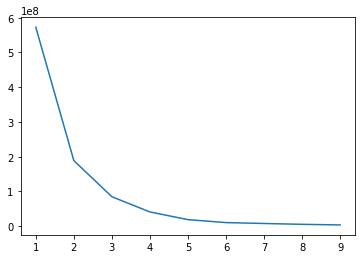

In [126]:
quantidade_k(df_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

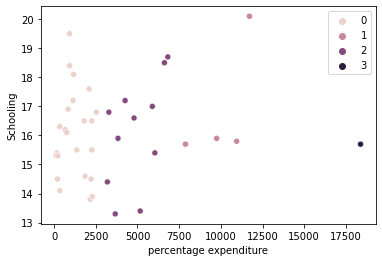

In [127]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [128]:
df_ = df_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Argentina,Australia,Brunei Darussalam,Switzerland
1,Bahrain,Austria,Finland,NaN
2,Belgium,Canada,Iceland,NaN
3,Chile,Sweden,Ireland,NaN
4,Croatia,NaN,Israel,NaN
5,Cyprus,NaN,Italy,NaN
6,Denmark,NaN,Qatar,NaN
7,Estonia,NaN,Singapore,NaN
8,France,NaN,Slovenia,NaN
9,Germany,NaN,Spain,NaN


# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


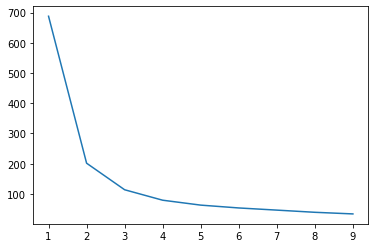

In [129]:
quantidade_k(df_alcool8, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

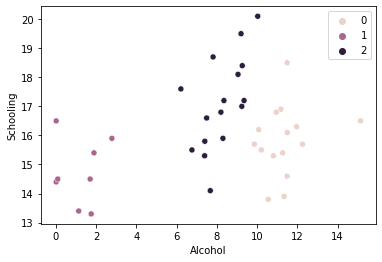

In [130]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool8, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [131]:
df_ = df_alcool8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Austria,Bahrain,Argentina
1,Belgium,Brunei Darussalam,Australia
2,Croatia,Estonia,Canada
3,Cyprus,Israel,Chile
4,France,Qatar,Denmark
5,Germany,Saudi Arabia,Finland
6,Hungary,Singapore,Greece
7,Ireland,United Arab Emirates,Iceland
8,Latvia,NaN,Italy
9,Lithuania,NaN,Japan


Índices de mortalidade infantil nesses países são extremamente baixos, tornando a análise irrelevante.